# **ETL**

## **Líbrerias y módulos necesarios**

In [24]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## **Conjunto de datos 1**

Inicialmente, se importa el primer conjunto de datos que contiene información detallada sobre la defunción de pacientes debido al cáncer de mama.

In [25]:
url = "https://raw.githubusercontent.com/sePerezAlbor/Data/refs/heads/main/datoscancermama.csv"
data = pd.read_csv(url, delimiter = ",", na_values = [" "])

Veamos las primeras cinco observaciones para realizar un análisis inicial del conjunto de datos.

In [26]:
data.head()

,COD_DPTO,cod_munic,a_defun,sit_defun,cod_inst,nom_inst,ano,mes,sexo,est_civil,...,causa_666,cau_homol,EDAD,llave,CODPTO,filter_$,AÑOL,MAMA,quinquenio,REGION
0,05,1.0,1.0,1.0,5.001021e+10,HOSPITAL PABLO TOBON URIBE,2014.0,7.0,2.0,1.0,...,208.0,24.0,NaN,0500111201407 21103,5.0,1.0,a,mama,2010a201,1.0
1,05,45.0,1.0,1.0,NaN,NaN,1997.0,8.0,2.0,5.0,...,NaN,24.0,NaN,0504511199708 25109,5.0,0.0,a,mama,1995a199,1.0
2,05,266.0,1.0,2.0,NaN,NaN,1986.0,4.0,2.0,1.0,...,NaN,24.0,NaN,0526612198604 21109,5.0,0.0,a,mama,1985a198,1.0
3,08,1.0,1.0,1.0,NaN,NaN,1989.0,7.0,2.0,2.0,...,NaN,24.0,NaN,0800111198907 22109,8.0,0.0,a,mama,1985a198,2.0
4,08,1.0,1.0,1.0,NaN,NaN,1998.0,8.0,2.0,2.0,...,208.0,24.0,10.0,0800111199808 22103,8.0,1.0,a,mama,1995a199,2.0


Las primeras cinco observaciones muestran datos con valores faltantes en varias columnas, diferencias en la codificación de variables y posibles inconsistencias en los identificadores de municipios e instituciones de salud. 

In [27]:
data.shape

(46869, 53)

El conjunto de datos inicial cuenta con **53** columnas (variables) y **46869** filas (observaciones).

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46869 entries, 0 to 46868
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COD_DPTO    46869 non-null  object 
 1   cod_munic   46833 non-null  float64
 2   a_defun     46833 non-null  float64
 3   sit_defun   46833 non-null  float64
 4   cod_inst    19126 non-null  float64
 5   nom_inst    19287 non-null  object 
 6   ano         46833 non-null  float64
 7   mes         46833 non-null  float64
 8   sexo        46833 non-null  float64
 9   est_civil   46833 non-null  float64
 10  gru_ed1     46833 non-null  float64
 11  nivel_edu   46833 non-null  float64
 12  MUERTEPORO  16839 non-null  float64
 13  SIMUERTEPO  917 non-null    float64
 14  OCUPACION   11317 non-null  object 
 15  IDPERTET    16839 non-null  float64
 16  codpres     29332 non-null  float64
 17  codptore    46833 non-null  float64
 18  codmunre    46833 non-null  float64
 19  area_res    33916 non-nul

A primera vista, observamos que las variables tienen nombres poco descriptivos, lo que dificulta la comprensión de su significado. Además, muchas de ellas están representadas como valores numéricos de tipo *float64*, aunque en realidad corresponden a categorías. Por ello, procederemos a redefinir los tipos de datos en función del significado de cada variable. También identificamos una alta presencia de datos faltantes en algunas columnas (incluyendo dos columnas que en su totalidad son datos faltantes), lo que requerirá un tratamiento adecuado.

In [29]:
column_types = {"COD_DPTO": "object", "cod_munic": "object", "a_defun": "object", "sit_defun": "object", "cod_inst": "Int64", "nom_inst": "object", 
                "ano": "Int64", "mes": "float64", "sexo": "object", "est_civil": "object", "gru_ed1": "object", "nivel_edu": "object", 
                "MUERTEPORO": "object", "SIMUERTEPO": "object", "OCUPACION": "object", "IDPERTET": "object", "codpres": "object", 
                "codptore": "object", "codmunre": "object", "area_res": "object", "seg_social": "object", "IDADMISALU": "object", 
                "IDCLASADMI": "object", "pman_muer": "object", "cons_exp": "object", "man_muer": "object", "c_muerte": "object", 
                "asis_med": "object", "IDPROFCER": "object", "causa_666": "object", "cau_homol": "object", "filter_$": "object",
                "quinquenio": "object", "REGION": "object"
}


In [30]:
data = pd.read_csv(url, delimiter = ",", na_values = [" "], dtype = column_types)
data.head()

,COD_DPTO,cod_munic,a_defun,sit_defun,cod_inst,nom_inst,ano,mes,sexo,est_civil,...,causa_666,cau_homol,EDAD,llave,CODPTO,filter_$,AÑOL,MAMA,quinquenio,REGION
0,05,001,1,1,50010210401,HOSPITAL PABLO TOBON URIBE,2014,7.0,2,1,...,208,024,NaN,0500111201407 21103,5.0,1,a,mama,2010a201,1
1,05,045,1,1,<NA>,NaN,1997,8.0,2,5,...,NaN,024,NaN,0504511199708 25109,5.0,0,a,mama,1995a199,1
2,05,266,1,2,<NA>,NaN,1986,4.0,2,1,...,NaN,024,NaN,0526612198604 21109,5.0,0,a,mama,1985a198,1
3,08,001,1,1,<NA>,NaN,1989,7.0,2,2,...,NaN,024,NaN,0800111198907 22109,8.0,0,a,mama,1985a198,2
4,08,001,1,1,<NA>,NaN,1998,8.0,2,2,...,208,024,10.0,0800111199808 22103,8.0,1,a,mama,1995a199,2


## **Datos Faltantes**

In [31]:
missing_percent = (data.isnull().sum() / len(data)) * 100
missing_percent = missing_percent.sort_values(ascending=False)
missing_percent[missing_percent > 0]

codocur       100.000000
codmunoc      100.000000
c_mcm1         99.850648
C_ANT32        99.639421
C_DIR12        99.372720
C_ANT22        98.978003
C_ANT12        98.600354
C_PAT2         98.483006
SIMUERTEPO     98.043483
man_muer       93.353816
c_ant3         85.721906
c_pat1         84.842860
OCUPACION      75.853976
IDCLASADMI     65.659604
IDADMISALU     65.529454
MUERTEPORO     64.072201
IDPERTET       64.072201
IDPROFCER      64.072201
EDAD           63.525998
cod_inst       59.192643
nom_inst       58.849133
c_ant2         57.935949
c_ant1         38.055004
codpres        37.417056
c_muerte       28.129467
c_dir1         27.796625
area_res       27.636604
asis_med       27.598199
pman_muer      27.598199
seg_social     27.598199
causa_666      27.598199
filter_$        0.076810
c_bas1          0.076810
cau_homol       0.076810
AÑOL            0.076810
llave           0.076810
MAMA            0.076810
quinquenio      0.076810
CODPTO          0.076810
REGION          0.076810


In [32]:
missing_count = missing_percent[missing_percent > 0].count()
print("La cantidad de variables con datos faltantes es de: ", missing_count)
missing_above_70 = missing_percent[missing_percent > 70]
print("La cantidad de variables con más del 70% de datos faltantes es de: ", missing_above_70.count())
missing_below_70 = missing_percent[missing_percent <= 70]
print("La cantidad de variables con menos del 70% de datos faltantes es de: ", missing_below_70.count())


La cantidad de variables con datos faltantes es de:  52
La cantidad de variables con más del 70% de datos faltantes es de:  13
La cantidad de variables con menos del 70% de datos faltantes es de:  40


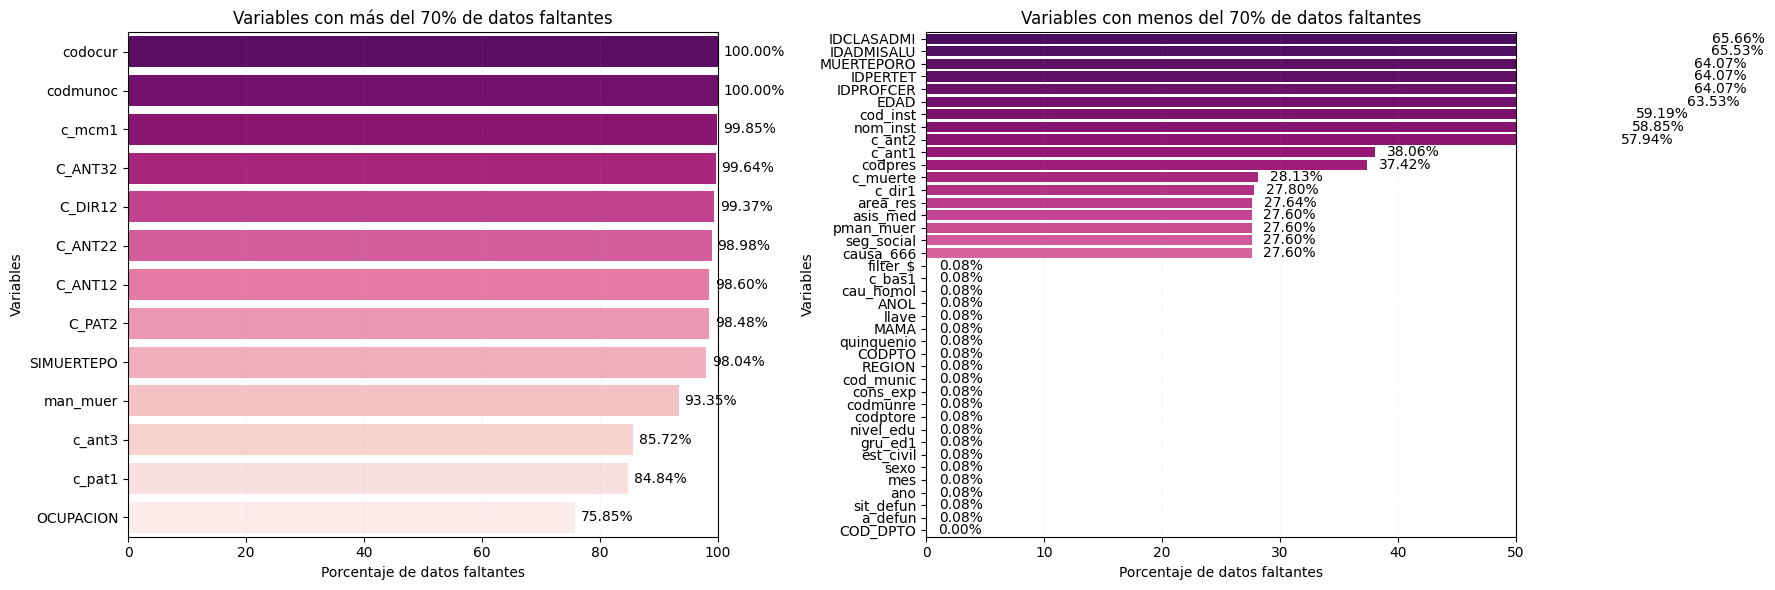

In [33]:

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=missing_above_70.values, y=missing_above_70.index, palette="RdPu_r", ax=axes[0])
axes[0].set_xlabel("Porcentaje de datos faltantes")
axes[0].set_ylabel("Variables")
axes[0].set_title("Variables con más del 70% de datos faltantes")
axes[0].set_xlim(0, 100)
axes[0].grid(axis="x", linestyle="--", alpha=0.1)

for index, value in enumerate(missing_above_70.values):
    axes[0].text(value + 1, index, f"{value:.2f}%", va="center", fontsize=10)

sns.barplot(x=missing_below_70.values, y=missing_below_70.index, palette="RdPu_r", ax=axes[1])
axes[1].set_xlabel("Porcentaje de datos faltantes")
axes[1].set_ylabel("Variables")
axes[1].set_title("Variables con menos del 70% de datos faltantes")
axes[1].set_xlim(0, 50)
axes[1].grid(axis="x", linestyle="--", alpha=0.1)

for index, value in enumerate(missing_below_70.values):
    axes[1].text(value + 1, index, f"{value:.2f}%", va="center", fontsize=10)

plt.tight_layout()
plt.show()

## **Eliminación de columnas**


Para optimizar el análisis, eliminamos ciertas variables que no aportan valor significativo. La decisión se tomó con base en los siguientes criterios:  



**1. Variables eliminadas por recomendación de expertos**  
Los especialistas en cáncer de mama recomendaron eliminar estas variables, ya que en este conjunto de datos NO son relevantes para el estudio:  
(`cau_homol`, `EDAD`, `llave`, `filter_$`, `AÑOL`, `MAMA`)  


**2. Variables eliminadas por contener 100% de valores nulos**  
Estas variables no tienen ninguna observación registrada, por lo que se descartan:  
(`codocur`, `codmunoc`)  



**3. Variables eliminadas por más del 75% de datos faltantes**  
Estas variables tienen un porcentaje muy alto de valores nulos, lo que dificulta su uso sin introducir sesgos en el análisis:  

| Variable      | % de valores nulos |
|--------------|-------------------|
| `C_ANT12`    | 98.60%            |
| `C_PAT2`     | 98.48%            |
| `SIMUERTEPO` | 98.04%            |
| `man_muer`   | 93.35%            |
| `c_ant3`     | 85.72%            |
| `c_pat1`     | 84.84%            |
| `OCUPACION`  | 75.85%            |

**4. Irrelevante** 
`quinquenio`


In [34]:
data = data.drop(columns=[
    'a_defun','cod_inst', 'nom_inst', 'MUERTEPORO', 'SIMUERTEPO', 'OCUPACION', 
    'codpres','codmunre', 'area_res', 'IDCLASADMI', 'cons_exp', 'man_muer' ,'codocur', 'codmunoc','C_DIR12', 
    'C_ANT12', 'C_ANT22','c_ant3', 'C_ANT32', 'c_pat1', 'C_PAT2',
    'c_mcm1', 'IDPROFCER',  'cau_homol', 'EDAD', 'llave', 'filter_$','AÑOL', 'MAMA', 'quinquenio'
])


In [35]:
data.shape

(46869, 23)

## **Renombrado de variables**

```{note}
La información utilizada para este estudio está basada en el Certificado de Defunción del Ministerio de Salud de Colombia {cite}`minsalud_defuncion`. En este caso, observaciones sobre casos de defunción relacionados con el cáncer de mama. 

```

In [36]:
data = data.rename(columns={
    'COD_DPTO': 'depto_ocurr',  # Departamento donde ocurrió la defunción (DIVIPOLA)
    'cod_munic': 'munic_ocurr',  # Municipio donde ocurrió la defunción (DIVIPOLA)
    'sit_defun': 'sitio_def',  # Sitio de la defunción
    'ano': 'año_def',  # Año en que ocurrió la defunción
    'mes': 'mes_def',  # Mes en que ocurrió la defunción
    'sexo': 'sexo',  # Sexo del fallecido
    'est_civil': 'estado_civil',  # Estado conyugal del fallecido
    'gru_ed1': 'grupo_edad',  # Agrupación de edades del fallecido
    'nivel_edu': 'nivel_edu',  # Nivel educativo del fallecido
    'IDPERTET': 'grupo_etnico',  # Pertenencia étnica del fallecido
    'codptore': 'depto_res',  # Departamento de residencia habitual del fallecido
    'seg_social': 'seg_social',  # Régimen de seguridad social del fallecido
    'IDADMISALU': 'ent_salud_cod',  # Código de la Entidad Administradora en Salud
    'pman_muer': 'prob_muerte',  # Probable manera de muerte
    'c_muerte': 'cert_medica',  # Cómo se determinó la causa de muerte
    'asis_med': 'asistencia_med',  # Recibió asistencia médica antes de fallecer
    'c_dir1': 'causa_directa',  # Causa directa de la defunción
    'c_ant1': 'causa_ant_1',  # Primera causa antecedente
    'c_ant2': 'causa_ant_2',  # Segunda causa antecedente
    'c_bas1': 'causa_basica',  # Código de la causa básica de la defunción
    'causa_666': 'causa_OPS',  # Causa agrupada según la lista OPS 6/67
    'CODPTO': 'depto_res',  # Departamento de residencia habitual del fallecido
    'REGION': 'region'  # Región del país donde ocurrió la defunción
})


In [37]:
data.head()

,depto_ocurr,munic_ocurr,sitio_def,año_def,mes_def,sexo,estado_civil,grupo_edad,nivel_edu,grupo_etnico,...,prob_muerte,cert_medica,asistencia_med,causa_directa,causa_ant_1,causa_ant_2,causa_basica,causa_OPS,depto_res,region
0,05,001,1,2014,7.0,2,1,10,3,6,...,1,2,1,J969,C782,C509,C509,208,5.0,1
1,05,045,1,1997,8.0,2,5,10,9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,C509,NaN,5.0,1
2,05,266,2,1986,4.0,2,1,10,9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1749,NaN,5.0,1
3,08,001,1,1989,7.0,2,2,10,9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1749,NaN,8.0,2
4,08,001,1,1998,8.0,2,2,10,3,NaN,...,1,2,1,J969,C780,C509,C509,208,8.0,2


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46869 entries, 0 to 46868
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   depto_ocurr     46869 non-null  object 
 1   munic_ocurr     46833 non-null  object 
 2   sitio_def       46833 non-null  object 
 3   año_def         46833 non-null  Int64  
 4   mes_def         46833 non-null  float64
 5   sexo            46833 non-null  object 
 6   estado_civil    46833 non-null  object 
 7   grupo_edad      46833 non-null  object 
 8   nivel_edu       46833 non-null  object 
 9   grupo_etnico    16839 non-null  object 
 10  depto_res       46833 non-null  object 
 11  seg_social      33934 non-null  object 
 12  ent_salud_cod   16156 non-null  object 
 13  prob_muerte     33934 non-null  object 
 14  cert_medica     33685 non-null  object 
 15  asistencia_med  33934 non-null  object 
 16  causa_directa   33841 non-null  object 
 17  causa_ant_1     29033 non-null 

## **Conjunto de datos 2**

In [39]:
column_types = {
    "Código Departamento": "object",
    "Código Municipio": "object",
    "Código Centro Poblado": "object",
    "Nombre Departamento": "object",
    "Nombre Municipio": "object",
    "Nombre Centro Poblado	": "object",
    "Tipo": "object"
}
url = "https://raw.githubusercontent.com/sePerezAlbor/Data/refs/heads/main/Divipola.csv"
dfp = pd.read_csv(url, delimiter = ",", na_values = [" "], dtype=column_types)
display(dfp)


,Código Departamento,Código Municipio,Código Centro Poblado,Nombre Departamento,Nombre Municipio,Nombre Centro Poblado,Tipo
0,05,05001,05001000,ANTIOQUIA,MEDELLÍN,MEDELLÍN,CM
1,05,05001,05001001,ANTIOQUIA,MEDELLÍN,PALMITAS,C
2,05,05001,05001004,ANTIOQUIA,MEDELLÍN,SANTA ELENA,C
3,05,05001,05001005,ANTIOQUIA,MEDELLÍN,PEDREGAL ALTO,IPM
4,05,05001,05001009,ANTIOQUIA,MEDELLÍN,ALTAVISTA,C
...,...,...,...,...,...,...,...
9200,99,99773,99773019,VICHADA,CUMARIBO,EL CAÑAVERAL,CAS
9201,99,99773,99773020,VICHADA,CUMARIBO,EL PROGRESO,CAS
9202,99,99773,99773021,VICHADA,CUMARIBO,EL TUPARRO,IP
9203,99,99773,99773022,VICHADA,CUMARIBO,LA 14,CAS


In [40]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9205 entries, 0 to 9204
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Código Departamento    9205 non-null   object
 1   Código Municipio       9205 non-null   object
 2   Código Centro Poblado  9205 non-null   object
 3   Nombre Departamento    9205 non-null   object
 4   Nombre Municipio       9205 non-null   object
 5   Nombre Centro Poblado  9205 non-null   object
 6   Tipo                   9205 non-null   object
dtypes: object(7)
memory usage: 503.5+ KB
